# CHURN PREDICTION using ANN

In [46]:
import pandas as pd
data=pd.read_csv(r"C:\Users\495875\ML-PROJECTS\credit_card_customer_churn_project\Churn_Modelling_Dataset.csv")

In [47]:
data

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,15606229,Obijiaku,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,9997,15569892,Johnstone,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,9998,15584532,Liu,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,9999,15682355,Sabbatini,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1


In [48]:
data.columns


Index(['RowNumber', 'CustomerId', 'Surname', 'CreditScore', 'Geography',
       'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary', 'Exited'],
      dtype='object')

In [49]:
data.EstimatedSalary.mean()

100090.2398809998

# to check if any column has null values

In [50]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [51]:
data['Exited'].value_counts()

0    7963
1    2037
Name: Exited, dtype: int64

In [52]:
data.drop(columns=["RowNumber","CustomerId","Surname"],inplace=True)

In [53]:
data

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...
9995,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1


# ONE HOT ENCODING

In [54]:
df=pd.get_dummies(data,columns=["Geography","Gender"],drop_first=True)

# Data Standardization

# splitting x and y of data

In [55]:
X=df.drop(columns=["Exited"])
y=df["Exited"]

In [56]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=1)

In [57]:
X_train

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Geography_Germany,Geography_Spain,Gender_Male
2694,628,29,3,113146.98,2,0,1,124749.08,1,0,1
5140,626,29,4,105767.28,2,0,0,41104.82,0,0,0
2568,612,47,6,130024.87,1,1,1,45750.21,1,0,0
3671,646,52,6,111739.40,2,0,1,68367.18,1,0,0
7427,714,33,8,122017.19,1,0,0,162515.17,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...
2895,621,47,7,107363.29,1,1,1,66799.28,1,0,1
7813,684,63,3,81245.79,1,1,0,69643.31,1,0,0
905,672,45,9,0.00,1,1,1,92027.69,0,0,0
5192,663,39,8,0.00,2,1,1,101168.90,0,0,0


In [58]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()

X_train_scaled =scaler.fit_transform(X_train)
X_test_scaled =scaler.transform(X_test)


In [59]:
print(X_test_scaled)

[[-1.03768121  0.77498705 -1.0482813  ... -0.58312392 -0.57273139
   0.91509065]
 [ 0.30708683 -0.46686456 -0.70174202 ... -0.58312392 -0.57273139
   0.91509065]
 [-1.23422423  0.29735181 -1.0482813  ... -0.58312392 -0.57273139
  -1.09278791]
 ...
 [-0.86182692 -0.46686456  1.72403288 ... -0.58312392  1.74601919
   0.91509065]
 [-0.30323097 -0.84897275 -1.0482813  ...  1.71490137 -0.57273139
  -1.09278791]
 [ 0.04847759  1.25262228  1.3774936  ...  1.71490137 -0.57273139
   0.91509065]]


In [60]:
#pip install tensorflow --user

In [61]:
import tensorflow 
from tensorflow import keras 
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense

# using Sigmoid fucntion

In [62]:
model=Sequential()
model.add(Dense(3,activation='sigmoid',input_dim=11))
model.add(Dense(1,activation='sigmoid'))


In [63]:
#model.summary()

#### 11 input dimensions                11*3+3 =36
#### converts into 3 neuron in hidden layers  3*1=1
##### converts in 1 output layer                  1
##### total 40 parameters

In [64]:
model.compile(loss='binary_crossentropy',optimizer='Adam')

In [65]:
model.fit(X_train_scaled,y_train,epochs=10)

Epoch 1/10
250/250 [==============================] - 1s 2ms/step - loss: 0.5146
Epoch 2/10
250/250 [==============================] - 0s 985us/step - loss: 0.4770
Epoch 3/10
250/250 [==============================] - 0s 986us/step - loss: 0.4604
Epoch 4/10
250/250 [==============================] - 0s 1ms/step - loss: 0.4495
Epoch 5/10
250/250 [==============================] - 0s 912us/step - loss: 0.4417
Epoch 6/10
250/250 [==============================] - 0s 911us/step - loss: 0.4361
Epoch 7/10
250/250 [==============================] - 0s 934us/step - loss: 0.4320
Epoch 8/10
250/250 [==============================] - 0s 922us/step - loss: 0.4288
Epoch 9/10
250/250 [==============================] - 0s 869us/step - loss: 0.4261
Epoch 10/10
250/250 [==============================] - 0s 893us/step - loss: 0.4236


In [66]:
#giving the values of 33+3 parameters of layer 1 and layer 2

In [67]:
model.layers[0].get_weights()

[array([[-0.43394792, -0.08595049,  0.01576159],
        [ 0.40134907, -0.55388564, -1.8085403 ],
        [-0.09770903, -0.02051449,  0.03998576],
        [-0.02362875,  0.09539626, -0.45033014],
        [-1.3870683 , -0.21335469, -0.07772593],
        [ 0.11752366,  0.35338795, -0.07462993],
        [-0.69990844,  0.43790284,  0.66568106],
        [-0.05151921,  0.3891714 , -0.28964838],
        [ 0.16968489, -0.7675983 , -0.39294574],
        [-0.10004482, -0.148351  ,  0.02898242],
        [-0.7460238 ,  0.24601483,  0.25280645]], dtype=float32),
 array([-0.5699937,  0.3334494,  0.4114641], dtype=float32)]

In [68]:
y_log=model.predict(X_test_scaled)

63/63 [==============================] - 0s 790us/step


In [69]:
import numpy as np
y_pred = np.where(y_log>0.5,1,0)

In [70]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred)

0.814

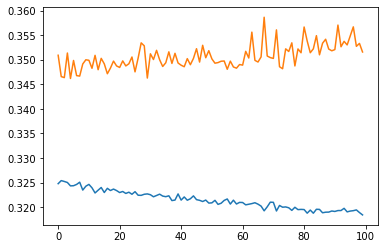

In [71]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

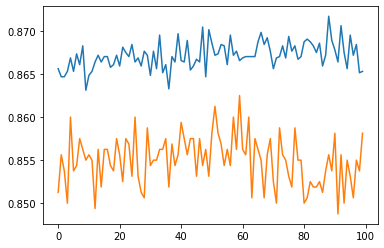

In [72]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])

# Using Relu

In [73]:
model=Sequential()
model.add(Dense(11,activation='relu',input_dim=11))
model.add(Dense(11,activation='relu'))
model.add(Dense(1,activation='sigmoid'))

In [74]:
model.compile(loss='binary_crossentropy',optimizer='Adam',metrics=['accuracy'])

In [ ]:
history=model.fit(X_train_scaled,y_train,epochs=100,validation_split=0.2)

Epoch 1/100
200/200 [==============================] - 1s 2ms/step - loss: 0.4947 - accuracy: 0.7997 - val_loss: 0.4533 - val_accuracy: 0.8056
Epoch 2/100
200/200 [==============================] - 0s 1ms/step - loss: 0.4416 - accuracy: 0.8100 - val_loss: 0.4305 - val_accuracy: 0.8156
Epoch 3/100
168/200 [========================>.....] - ETA: 0s - loss: 0.4288 - accuracy: 0.8179

In [ ]:
history.history

In [ ]:
import matplotlib.pyplot as plt

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

In [ ]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])